## Red and White Wine Classification ##
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 <br>
https://www.kaggle.com/piyushagni5/white-wine-quality?select=winequality.names

Parameters:
 - Fixed Acidity. Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
 - Volatile Acidity. The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
 - Citric Acid. Found in small quantities, citric acid can add 'freshness' and flavor to wines.
 - Residual Sugar. The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
 - Chlorides. The amount of salt in the wine.
 - Free Sulfur Dioxide. The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
 - Total Sulfur Dioxide. Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
 - Density. The density of water is close to that of water depending on the percent alcohol and sugar content.
 - pH. Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
 - Sulphates. A wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant.
 - Alcohol. The percent alcohol content of the wine.
 - Quality. Output variable (based on sensory data, score between 0 and 10).

Importing 'pandas', 'pandas_profiling' and 'numpy' to process the dataset.

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib

ModuleNotFoundError: No module named 'pandas_profiling'

Importing 'matplotlib', 'scipy.stats' and 'seaborn' to visualize the data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
red_wine_data = pd.read_csv("winequality-red.csv")
white_wine_data = pd.read_csv("winequality-white.csv")

### Graphs ###

How many wines were ranked in each quality

In [ ]:
df_quality = df.groupby(df['quality']).size()
df_quality.plot(kind = "bar")

Fixed acidity against quality

In [ ]:
source_df= df.groupby('fixed acidity')[['quality']].mean()
matplotlib.rcParams['figure.figsize'] = (10, 10)


source_df.plot.area()
df['group_column']=df['fixed acidity'].apply(lambda x:int(x) ).astype(int)

### Correlation ###
Let us find the overall correlation between the different parameters in order to get a better idea about the relationship of similar parameters (such as 'citric acid' and 'fixed acidity') and to confirm our suspicions.

In [ ]:
def CorrelationTable(data, title):
    # Compute the correlation matrix:
    pandas_correlation = data.corr()

    # Generating a mask for the upper triangle for a cleaner table:
    mask = np.triu(np.ones_like(pandas_correlation, dtype=bool))

    # Set up the matplotlib figure:
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap:
    cmap = sns.diverging_palette(20, 230, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio:
    sns.heatmap(pandas_correlation, mask=mask, cmap=cmap, vmax=.7, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    # Title:
    plt.title(title)

    plt.show()

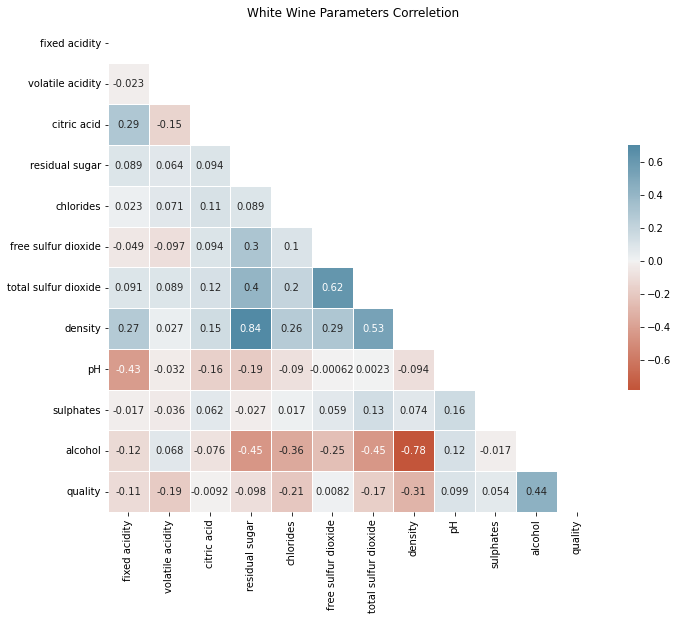

In [ ]:
CorrelationTable(white_wine_data, 'White Wine Parameters Correletion')

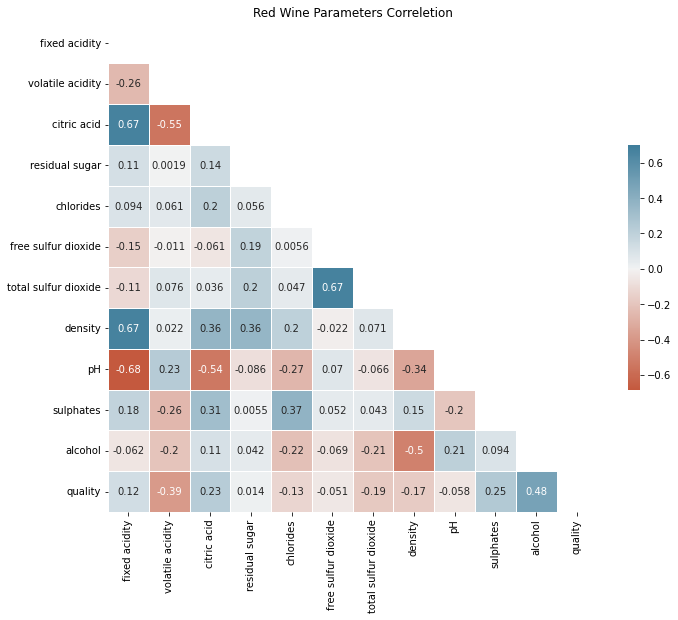

In [ ]:
CorrelationTable(red_wine_data, 'Red Wine Parameters Correletion')

Lets use the Pandas Profile Report for a fast analyses:

In [ ]:
red_profile = red_wine_data.profile_report(title="Red Wine Report")
red_profile.to_file(output_file="Red Wine Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 41.66it/s]


In [ ]:
white_profile = white_wine_data.profile_report(title="White Wine Report")
white_profile.to_file(output_file="White Wine Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 40.00it/s]


### Lets Merge The Two ###

TODO: Use "data = data.drop(data.index[range(5)])" to make white whine's sample size similar to teh red's. (randomize it first)

In [ ]:
red_wine_data['type'] = 'red'
white_wine_data['type'] = 'white'

wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True).sample(frac=1)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5332,6.5,0.19,0.34,1.60,0.029,39.0,116.0,0.98954,3.21,0.68,12.5,6,white
1141,8.2,0.38,0.32,2.50,0.080,24.0,71.0,0.99624,3.27,0.85,11.0,6,red
3198,6.7,0.33,0.49,1.60,0.167,20.0,94.0,0.99140,3.11,0.50,11.4,6,white
5183,7.4,0.25,0.28,7.25,0.028,14.0,78.0,0.99238,2.94,0.37,11.5,7,white
4327,6.5,0.35,0.28,12.40,0.051,86.0,213.0,0.99620,3.16,0.51,9.9,6,white


Use corollations in order to make linear regression learning thing.

<AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>

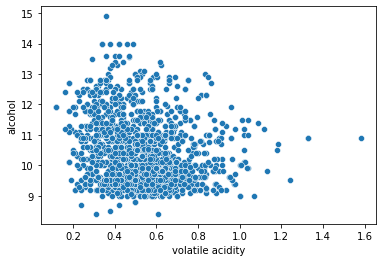

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
#sns.pairplot(wine_data)
sns.scatterplot(x='volatile acidity',y='alcohol', data = red_wine_data)
#print(sns.scatterplot(x='fixed acidity', y='quality', data=wine_data))


<AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>

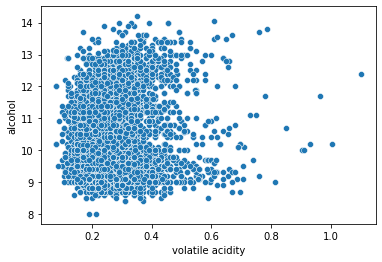

In [ ]:
sns.scatterplot(x='volatile acidity',y='alcohol', data = white_wine_data)

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

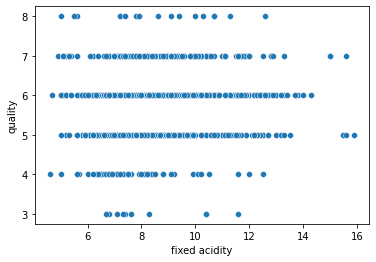

In [ ]:
sns.scatterplot(x='fixed acidity', y='quality', data=red_wine_data)

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

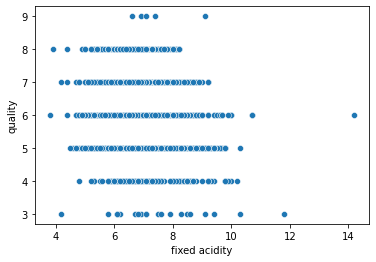

In [ ]:
sns.scatterplot(x='fixed acidity', y='quality', data=white_wine_data)

<AxesSubplot:xlabel='fixed acidity', ylabel='type'>

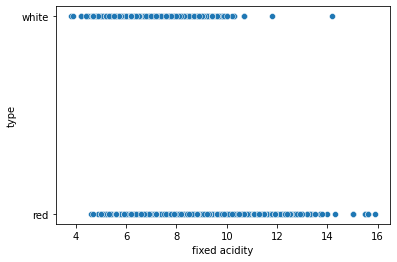

In [ ]:
sns.scatterplot(x='fixed acidity', y='type', data=wine_data)

<AxesSubplot:>

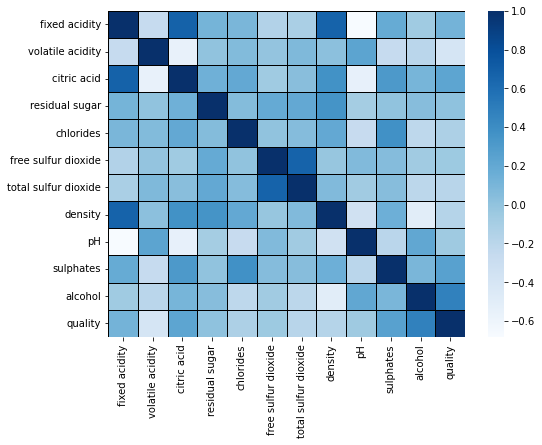

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(red_wine_data.corr(),cmap='Blues',linewidth=1,linecolor='Black')

<AxesSubplot:>

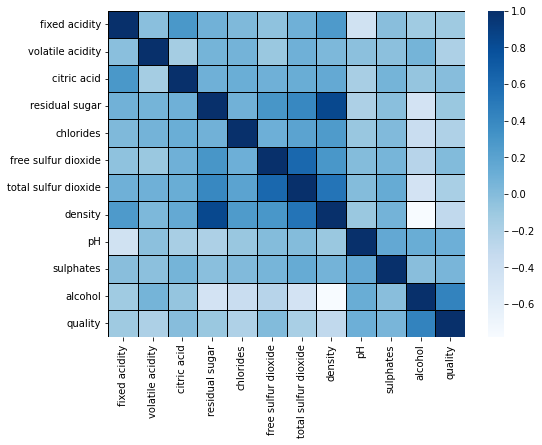

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(white_wine_data.corr(),cmap='Blues',linewidth=1,linecolor='Black')

In [ ]:
x=wine_data.drop(['quality','type'],axis=1)
y=wine_data['type']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced',solver='lbfgs', max_iter=1000)
model.fit(x_train , y_train)
PredictNobalance = model.predict(x_test)

model.score(x_test,y_test)

0.98

In [ ]:
X=wine_data.drop(['quality','type'],axis=1)
Y=wine_data['type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
predictbalance = model.predict(X_test)
model.score(X_test,Y_test)

0.9923076923076923

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, PredictNoBalance))

              precision    recall  f1-score   support

         red       0.93      0.98      0.95       323
       white       0.99      0.98      0.98       977

    accuracy                           0.98      1300
   macro avg       0.96      0.98      0.97      1300
weighted avg       0.98      0.98      0.98      1300



In [ ]:
print(classification_report(Y_test, predictbalance))

              precision    recall  f1-score   support

         red       0.99      0.98      0.98       323
       white       0.99      1.00      0.99       977

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300

